## **Dispersion Relations of Equatorial Waves**

### **General Dispersion Relation**
The dispersion relation for the shallow water equations on the equatorial β-plane can be written in nondimensional form as:

$$
\hat{\omega}^2 - \hat{k}^2 - \frac{\hat{k}}{\hat{\omega}} = 2m + 1
$$

Here, the hat notation (e.g., $\hat{k}$, $\hat{\omega}$) indicates that both the wavenumber and frequency have been **nondimensionalized**.

#### **Visualization of Possible Soultions**
The possible solutions vary depending on the meridional mode number $(m)$. However, it is important to note that not all of these solutions are physically meaningful. We will discuss this in more detail later on.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def display_possible_dispersion_relation(m: int):
    """
    Plots the dispersion relation for a given integer value of m.
    $$\hat{\omega}^2 - \hat{k}^2 - \frac{\hat{k}}{\hat{\omega}} = 2m + 1$$
    """
    # Define the grid
    x = np.linspace(-5, 5, 2000, endpoint=False)
    y = np.linspace(-5, 5, 2000, endpoint=False)
    X, Y = np.meshgrid(x, y)

    # Avoid division by zero
    Y[Y == 0] = np.nan

    # Define the implicit function
    F = Y**2 - X**2 - X / Y - (2 * m + 1)

    # Plot
    plt.figure(figsize=(16, 9), dpi=160)
    plt.contour(x, y, F, levels=[0], colors="tab:red", linewidths=2)
    plt.axhline(0, color="black", linewidth=2)
    plt.axvline(0, color="black", linewidth=2)
    plt.grid(True)
    plt.xlabel("Wavenumber " + r"$(\hat{k})$", fontsize=16)
    plt.ylabel("Frequency " + r"$(\hat{\omega})$", fontsize=16)
    plt.xticks(np.arange(-4, 5, 1))
    plt.yticks(np.arange(0, 5, 1))
    plt.xlim(-4, 4)
    plt.ylim(0, 4)
    plt.title(
        r"$\hat{\omega}^2 - \hat{k}^2 - \frac{\hat{k}}{\hat{\omega}} = 2m + 1$"
        + "\n"
        + f"m = {m}"
    )
    plt.tight_layout()
    plt.show()
    return None

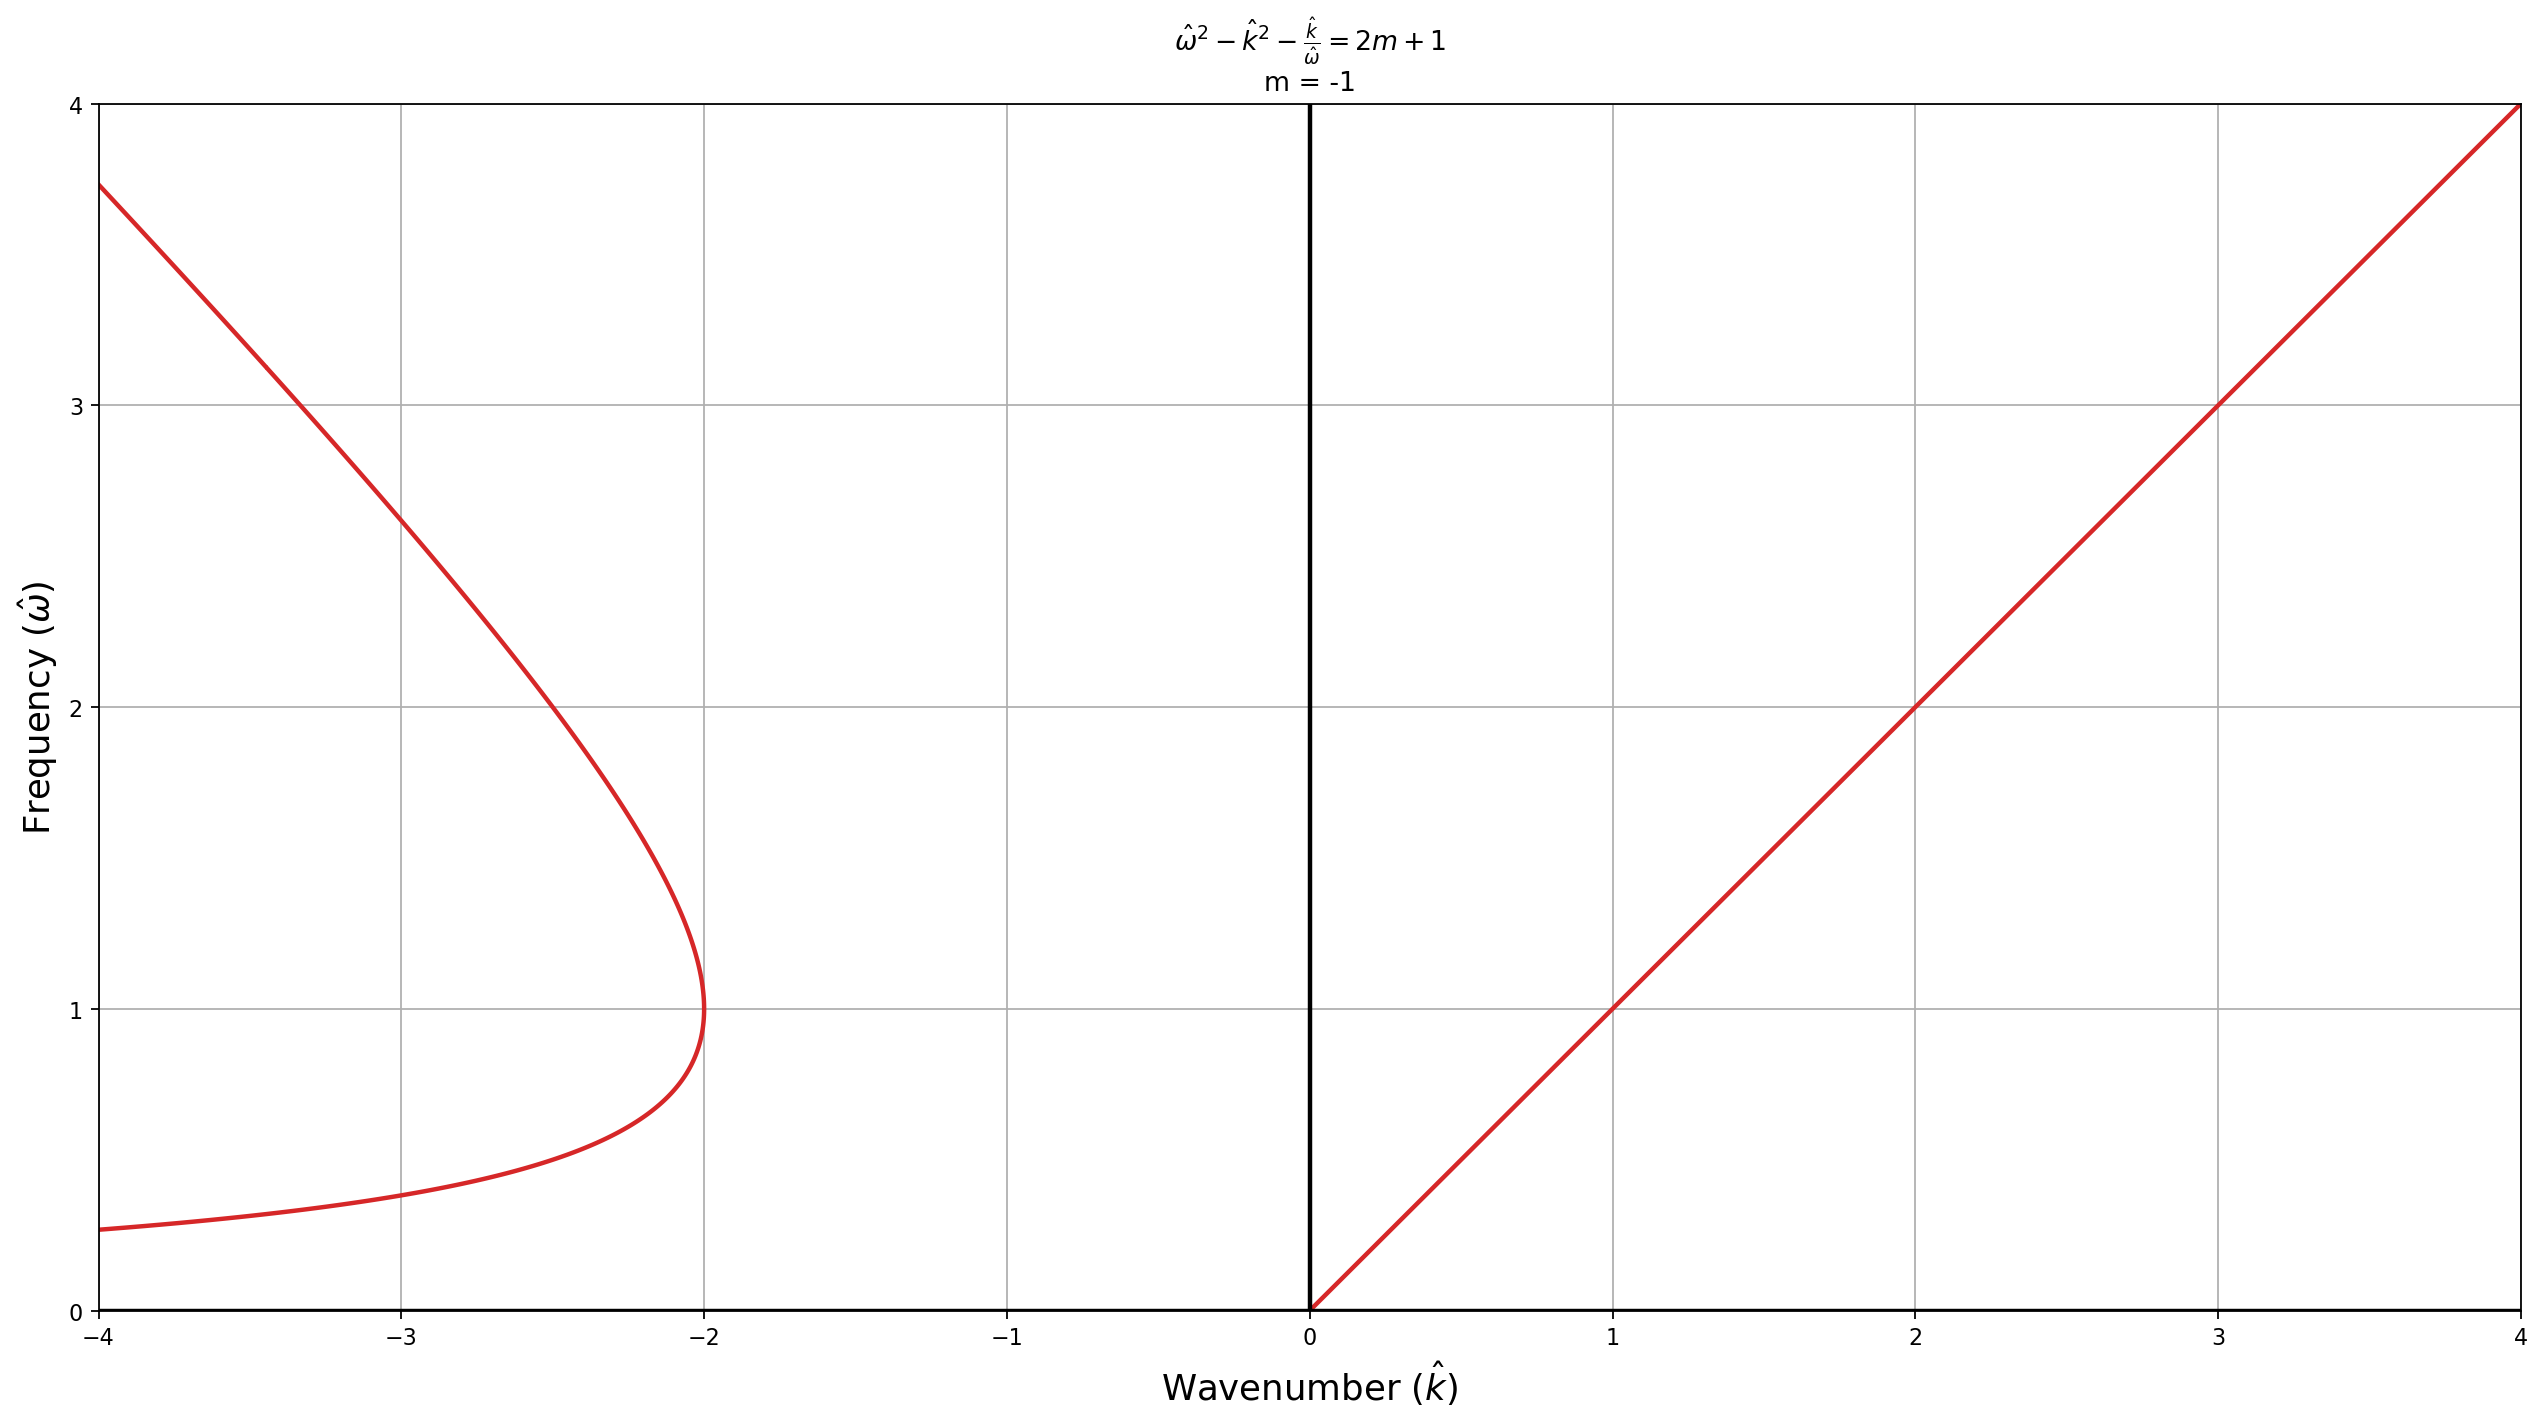

In [5]:
display_possible_dispersion_relation(m=-1)

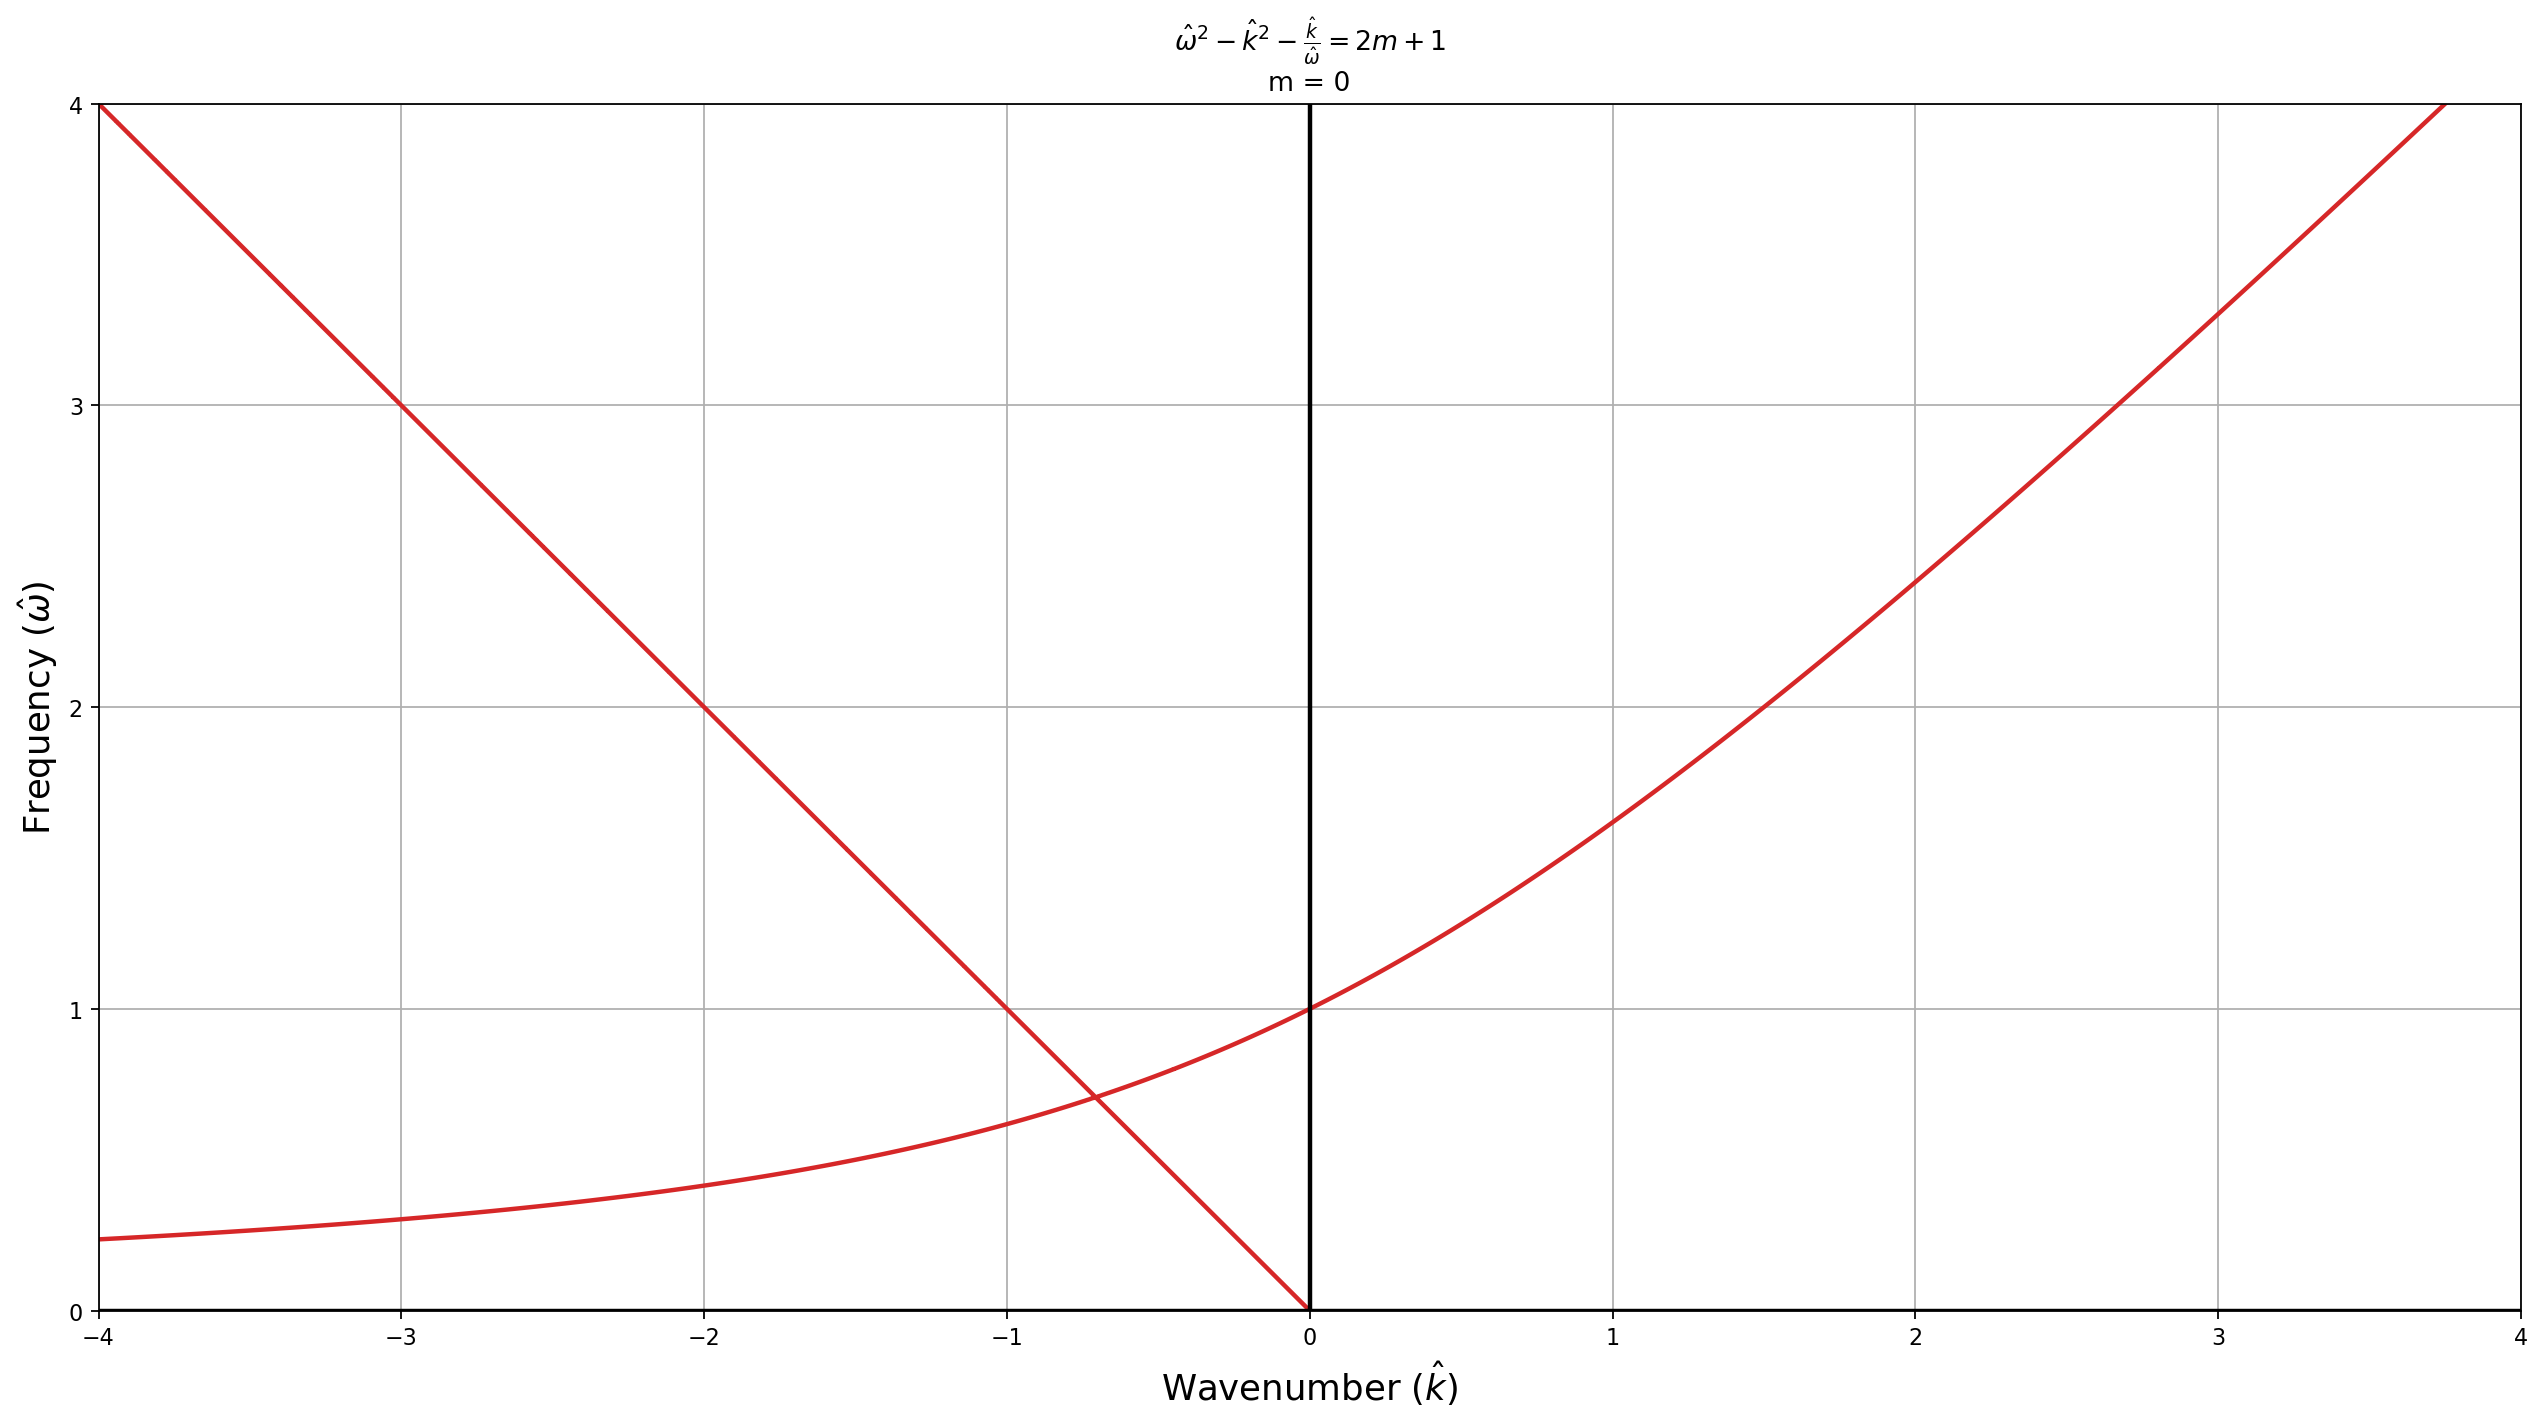

In [6]:
display_possible_dispersion_relation(m=0)

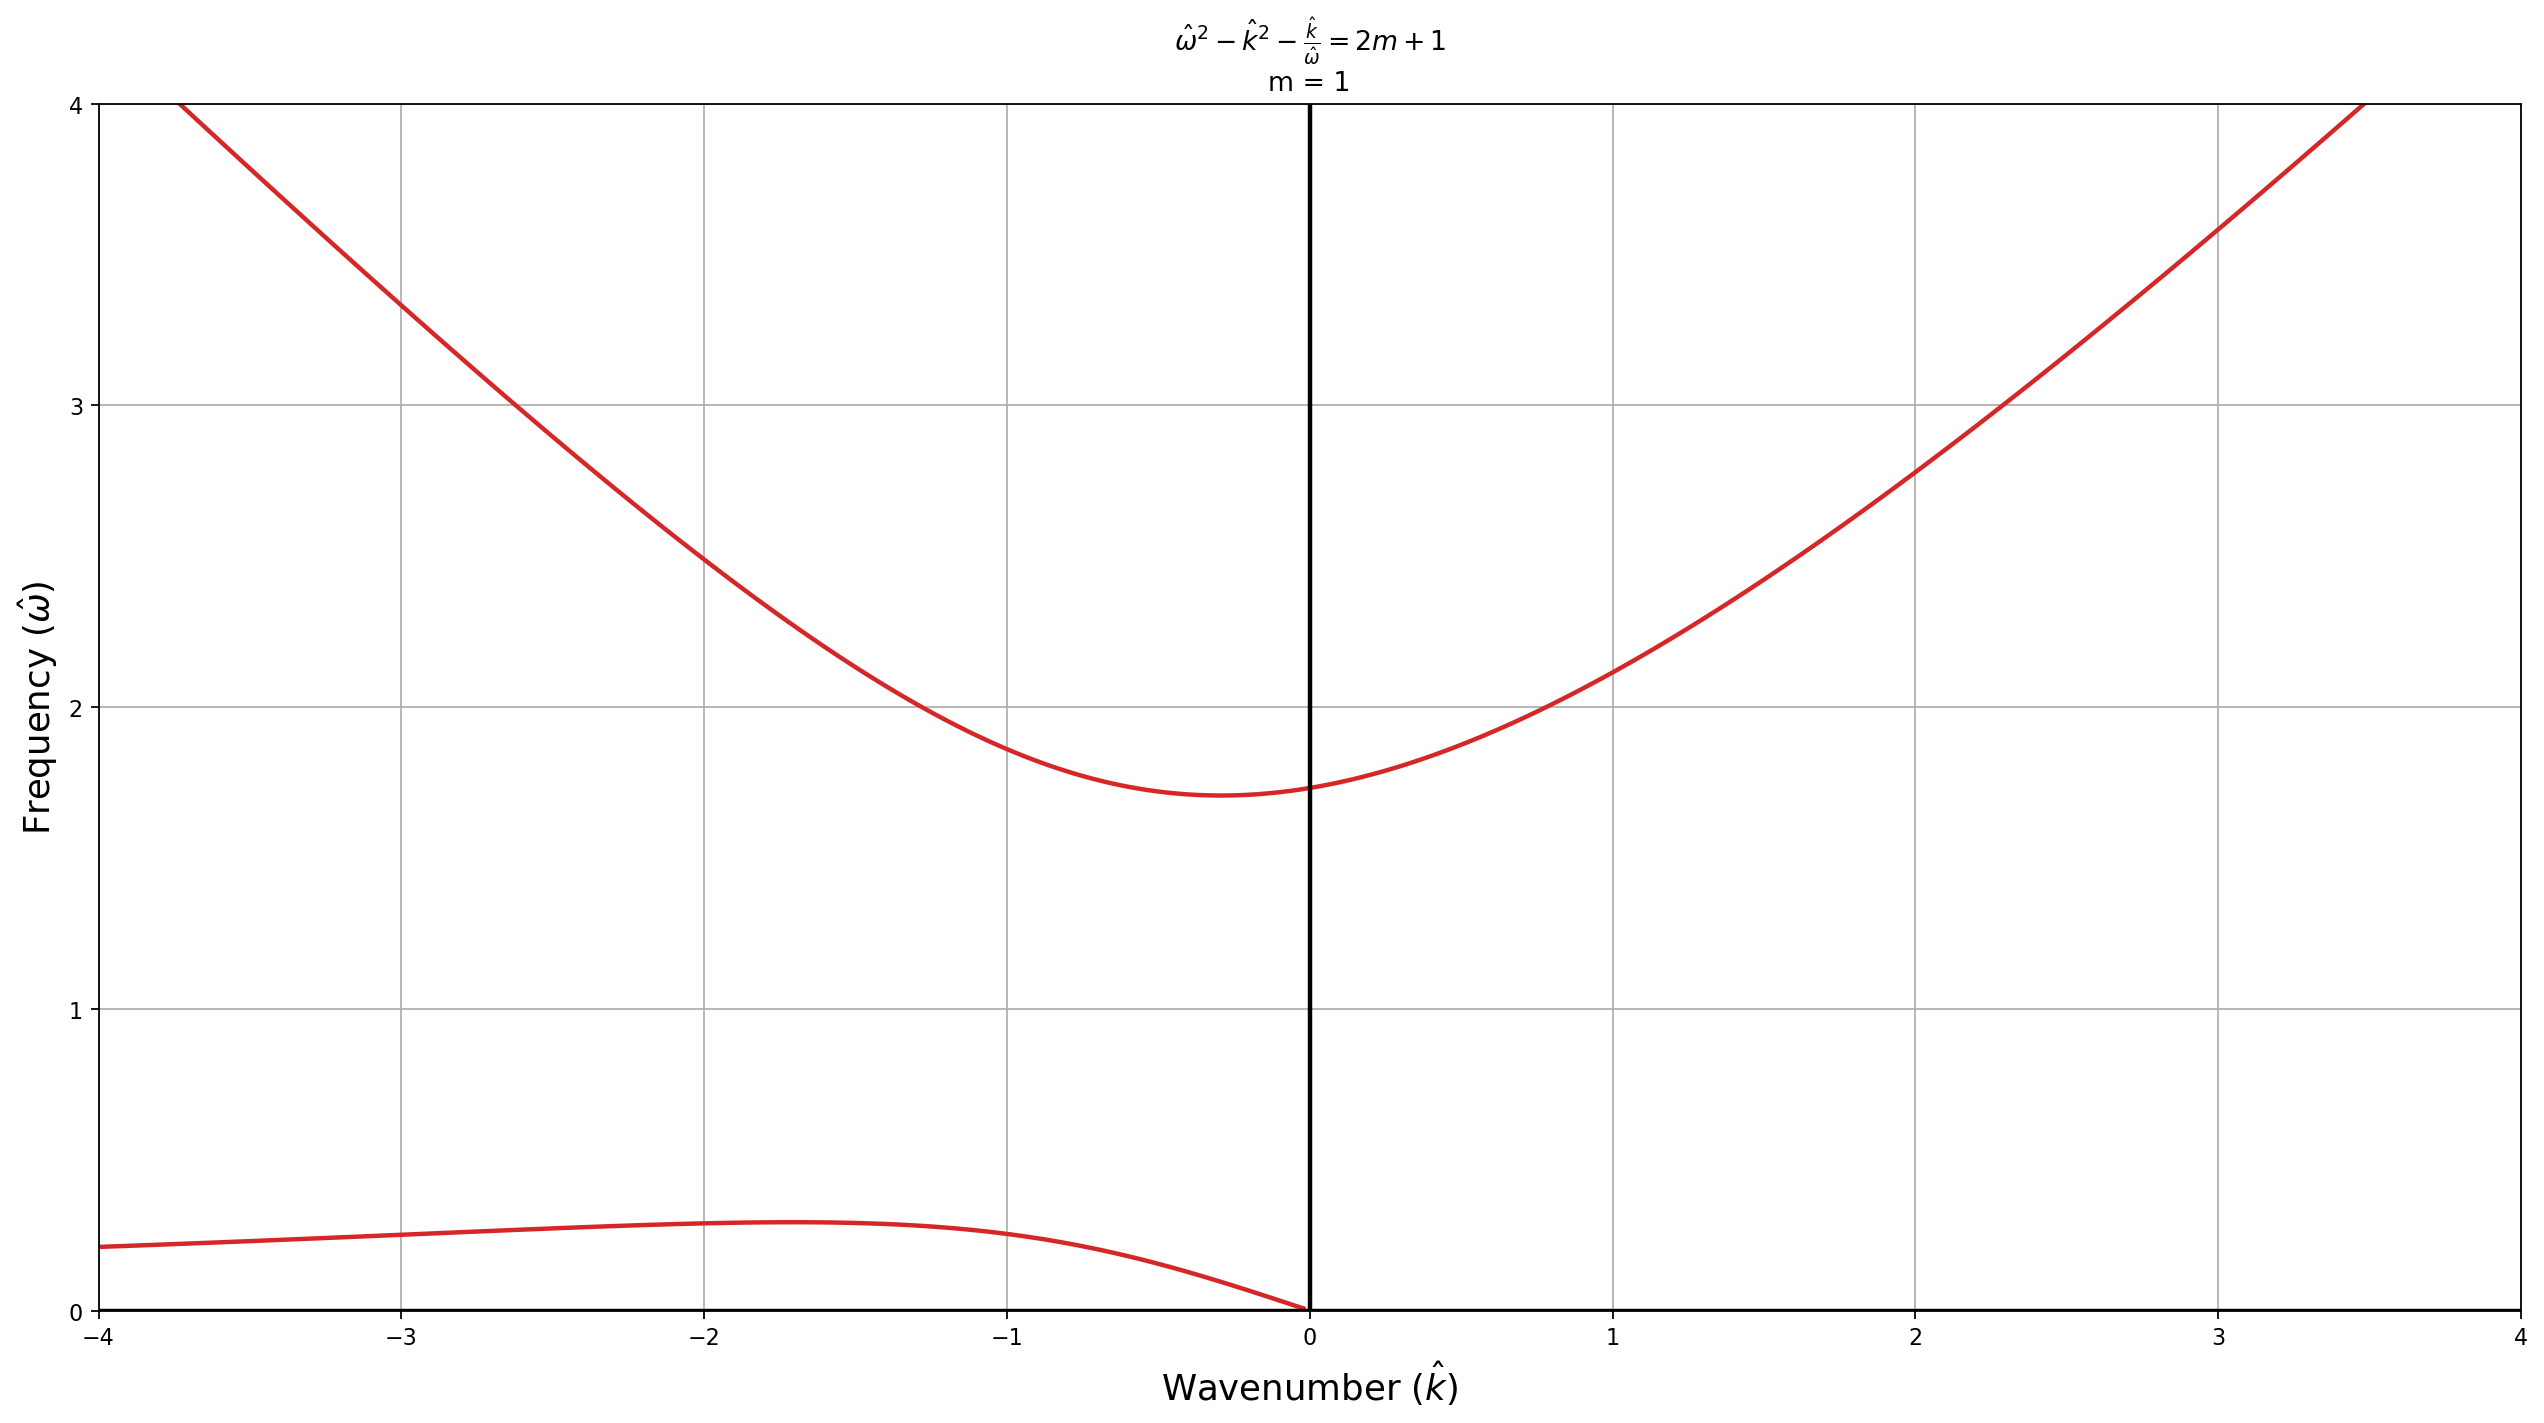

In [7]:
display_possible_dispersion_relation(m=1)

### **Specific Dispersion Relation**
By applying specific assumptions or constraints—such as boundary conditions in the $y$-direction, frequency scale, and spatial scale—one can derive *physically meaningful* and *analytical* solutions corresponding to distinct wave types. These simplified dispersion relations are as follows:

- **Poincaré waves**: $$\hat{\omega}^2 = \hat{k}^2 + 2m + 1$$
- **Rossby waves**: $$\hat{\omega} = \frac{-\hat{k}}{2m + 1 + \hat{k}^2}$$
- **Mixed Rossby-gravity waves**: $$\hat{\omega} = \frac{\hat{k}}{2} + \sqrt{1 + \frac{\hat{k}^2}{4}}$$
- **Kelvin waves**: $$\hat{\omega} = \hat{k}$$

#### **Visualization**

The dispersion relations presented above are physically meaningful and analytical. However, it is important to note that the relations for Rossby and Poincaré waves are simplified approximations. These approximations are obtained by neglecting certain terms from the more complex exact dispersion relations.

Although the exact dispersion relation cannot be calculated analytically, it can be solved numerically (see [iterative Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method)). However, numerical solutions are often less favored due to their complexity and computational demands.

Therefore, we first present the analytical solutions as they provide useful approximations for understanding wave behavior. Later, we will compare these simplified relations with the exact dispersion relation, as discussed in Vallis Chapter 8.2.

In [8]:
def dispersion_kelvin(k):
    """
    Dispersion relation for Kelvin waves.

    Parameters:
    k : array-like
        Nondimensional wavenumber values.

    Returns:
    omega_positive : array-like
        Nondimensional positive frequency (omega) values, NaN for negative values.

    Notes:
    The original function is real-valued and exhibits Hermitian symmetry in the wavenumber-frequency space.
    By convention, scientists retain only the positive frequencies, and this function follows that tradition.
    """
    dispersion_relation = lambda k: k
    omega = dispersion_relation(k)
    omega_positive = np.where(omega >= 0, omega, np.nan)
    return omega_positive


def dispersion_mrg(k):
    """
    Dispersion relation for Mixed Rossby-Gravity (MRG) waves.

    Parameters:
    k : array-like
        Nondimensional wavenumber values.

    Returns:
    omega_positive : array-like
        Nondimensional positive frequency (omega) values, NaN for negative values.

    Notes:
    The original function is real-valued and exhibits Hermitian symmetry in the wavenumber-frequency space.
    By convention, scientists retain only the positive frequencies, and this function follows that tradition.
    """
    dispersion_relation = lambda k: k / 2 + np.sqrt(1 + k**2 / 4)
    omega = dispersion_relation(k)
    omega_positive = np.where(omega >= 0, omega, np.nan)
    return omega_positive


def dispersion_poincare(k, m=1, method="approximate"):
    """
    Dispersion relation for Poincaré waves.

    Parameters:
    k : array-like
        Nondimensional wavenumber values.
    m : int, optional
        Meridional mode number, default is 1.
    method : str, optional
        Calculation method for the dispersion relation. Options are:
        - 'approximate' (default): Uses the simplified analytical formula.
        - 'iterative': Uses an iterative approach to solve the exact dispersion relation.

    Returns:
    omega_positive : array-like
        Nondimensional positive frequency (omega) values. Returns NaN for negative or invalid values.

    Raises:
    ValueError: If the specified method is not 'approximate' or 'iterative'.

    Notes:
    - Approximate Method:
      Uses the simplified dispersion relation for Poincaré waves:
          omega = sqrt(k^2 + 2m + 1)
      This method is computationally efficient and suitable for quick approximations.

    - Iterative Method:
      Uses an iterative approach (Newton's method) to solve the exact cubic dispersion relation:
          omega = sqrt(2 * m + 1 + k^2 + k / omega)
      This method provides more accurate results but requires more computation.
      The initial guess for omega is set to infinity, and the iteration count is set to 100.
    """

    def _dispersion_relation_approximate(k, m):
        dispersion_relation = lambda k: np.sqrt(k**2 + 2 * m + 1)
        omega = dispersion_relation(k)
        omega_positive = np.where(omega >= 0, omega, np.nan)
        return omega_positive

    def _dispersion_relation_exact(k, m, first_guess=np.inf, niter=100):
        dispersion_relation = lambda omega: np.sqrt(2 * m + 1 + k**2 + k / omega)
        omega_approx = dispersion_relation(first_guess)
        for _ in range(niter):
            omega_approx = dispersion_relation(omega_approx)
        omega_positive = np.where(omega_approx >= 0, omega_approx, np.nan)
        return omega_positive

    if method == "approximate":
        return _dispersion_relation_approximate(k, m)
    elif method == "iterative":
        return _dispersion_relation_exact(k, m)
    else:
        raise ValueError("Invalid method. Choose 'approximate' or 'iterative'.")


def dispersion_rossby(k, m=1, method="approximate"):
    """
    Dispersion relation for Rossby waves.

    Parameters:
    k : array-like
        Nondimensional wavenumber values.
    m : int, optional
        Meridional mode number, default is 1.
    method : str, optional
        Calculation method for the dispersion relation. Options are:
        - 'approximate' (default): Uses the simplified analytical formula.
        - 'iterative': Uses an iterative approach to solve the exact dispersion relation.

    Returns:
    omega_positive : array-like
        Nondimensional positive frequency (omega) values. Returns NaN for negative or invalid values.

    Raises:
    ValueError: If the specified method is not 'approximate' or 'iterative'.

    Notes:
    - Approximate Method:
      Uses the simplified dispersion relation for Rossby waves:
          omega = -k / (k^2 + 2m + 1)
      This method is computationally efficient and suitable for quick approximations.

    - Iterative Method:
      Uses an iterative approach (Newton's method) to solve the exact cubic dispersion relation:
          omega = (omega^3 - k) / (2m + 1 + k^2)
      This method provides more accurate results but requires more computation.
      The initial guess for omega is set to 0, and the iteration count is set to 100.
    """

    def _dispersion_relation_approximate(k, m):
        dispersion_relation = lambda k: (-k) / (k**2 + 2 * m + 1)
        omega = dispersion_relation(k)
        omega_positive = np.where(omega >= 0, omega, np.nan)
        return omega_positive

    def _dispersion_relation_exact(k, m, first_guess=0.0, niter=100):
        dispersion_relation = lambda omega: (omega**3 - k) / (2 * m + 1 + k**2)
        omega_approx = dispersion_relation(first_guess)
        for _ in range(niter):
            omega_approx = dispersion_relation(omega_approx)
        omega_positive = np.where(omega_approx >= 0, omega_approx, np.nan)
        return omega_positive

    if method == "approximate":
        return _dispersion_relation_approximate(k, m)
    elif method == "iterative":
        return _dispersion_relation_exact(k, m)
    else:
        raise ValueError("Invalid method. Choose 'approximate' or 'iterative'.")


def display_specific_dispersion_relation(method="approximate"):
    """
    Plots the theoretical dispersion relations for various equatorial shallow water waves:
    Kelvin wave, Mixed Rossby-Gravity (MRG) wave, Poincaré waves, and Rossby waves.
    """
    wavenumbers = np.linspace(-5, 5, 800 + 1, endpoint=True)

    plt.figure(figsize=(16, 9), dpi=160)

    # Reference line at k = 0
    plt.plot([0, 0], [0, 4], "k-", lw=0.5)

    plt.grid(True)

    # Kelvin wave
    plt.plot(wavenumbers, dispersion_kelvin(wavenumbers), "k-")
    plt.text(1.9, 1.8, "Kelvin Wave", fontsize=14)

    # Mixed Rossby-Gravity (MRG) wave
    plt.plot(wavenumbers, dispersion_mrg(wavenumbers), "r--")
    plt.text(-0.6, 1.1, "MRG Wave", fontsize=14)

    # Poincaré waves (Eastward and Westward inertia-gravity)
    for m in range(1, 4):
        plt.plot(wavenumbers, dispersion_poincare(wavenumbers, m=m, method=method), "b")
    plt.text(-0.9, 2.8, "Poincaré Wave", fontsize=14)

    # Rossby waves
    for m in range(1, 4):
        plt.plot(wavenumbers, dispersion_rossby(wavenumbers, m=m, method=method), "k--")
    plt.text(-1.4, 0.3, "Rossby Wave", fontsize=14)

    # Axis ticks and labels
    plt.xticks(np.linspace(-4, 4, 9, dtype=int), fontsize=14)
    plt.yticks(np.linspace(0, 4, 5, dtype=int), fontsize=14)
    plt.xlim(-4, 4)
    plt.ylim(0, 4)
    plt.xlabel("Nondimensional wavenumber", fontsize=14)
    plt.ylabel("Nondimensional frequency", fontsize=14)

    # Title
    plt.title("Specific Dispersion Relation", fontsize=18)

    # Layout and display
    plt.tight_layout()
    plt.show()

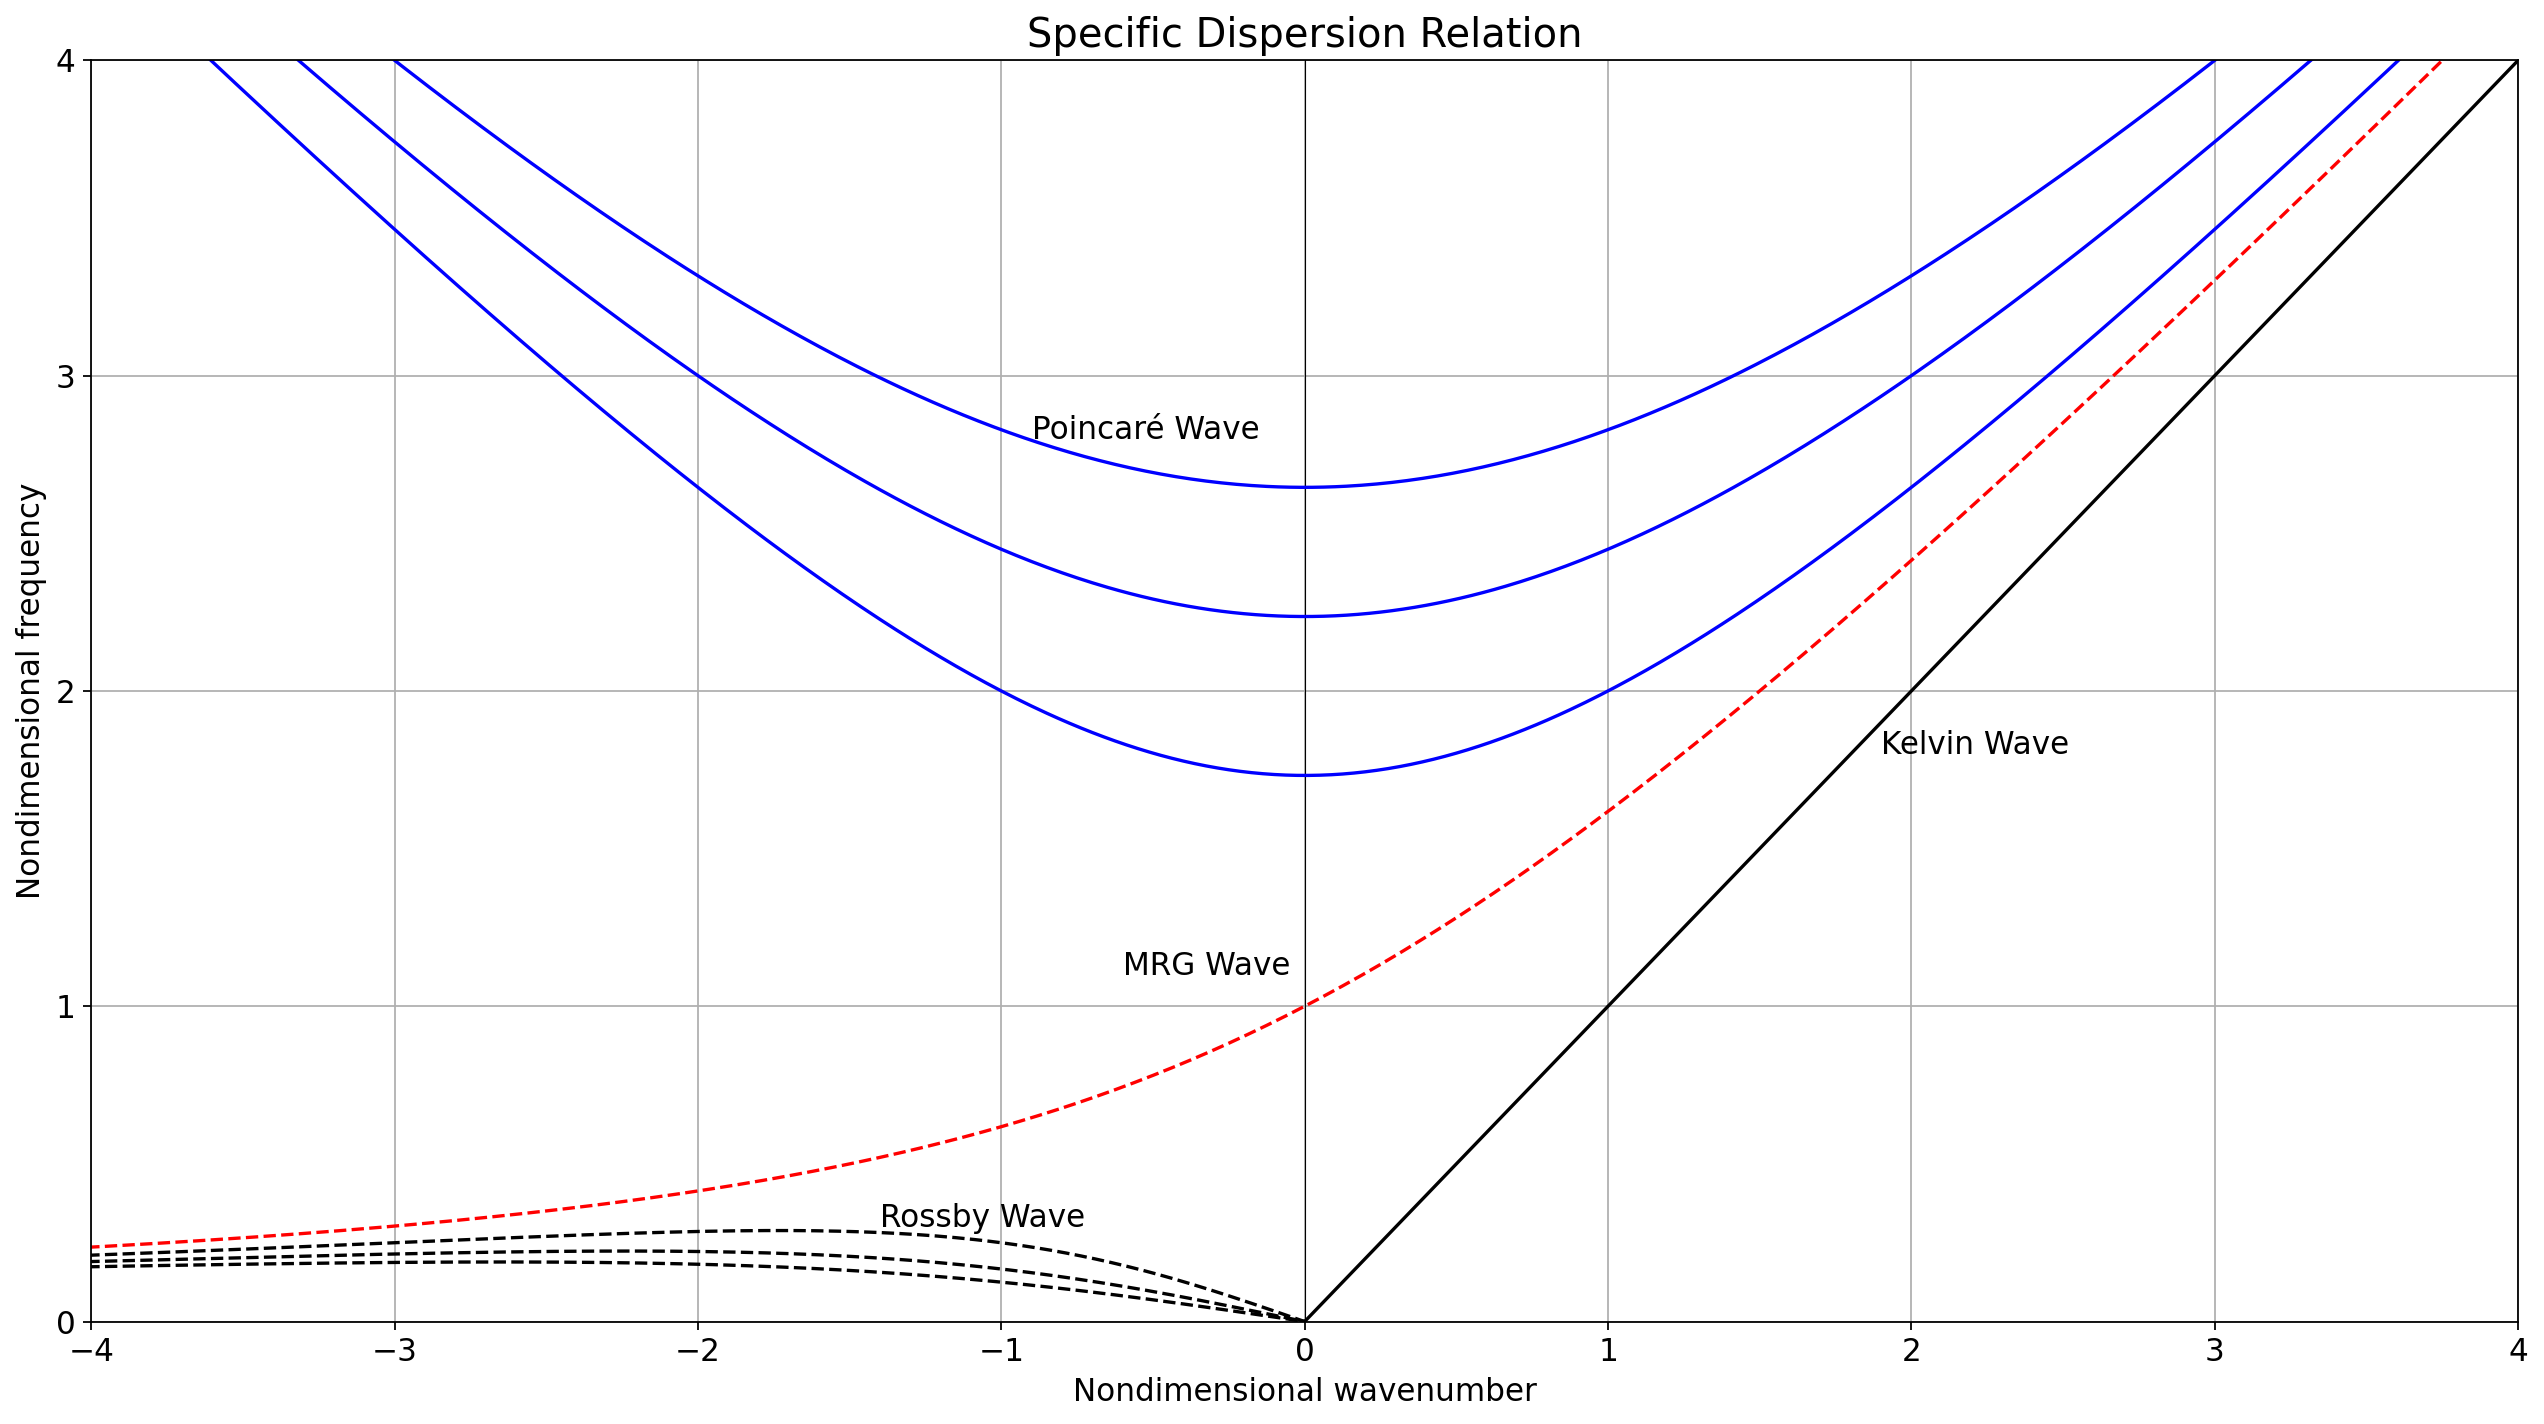

In [9]:
display_specific_dispersion_relation(method="approximate")

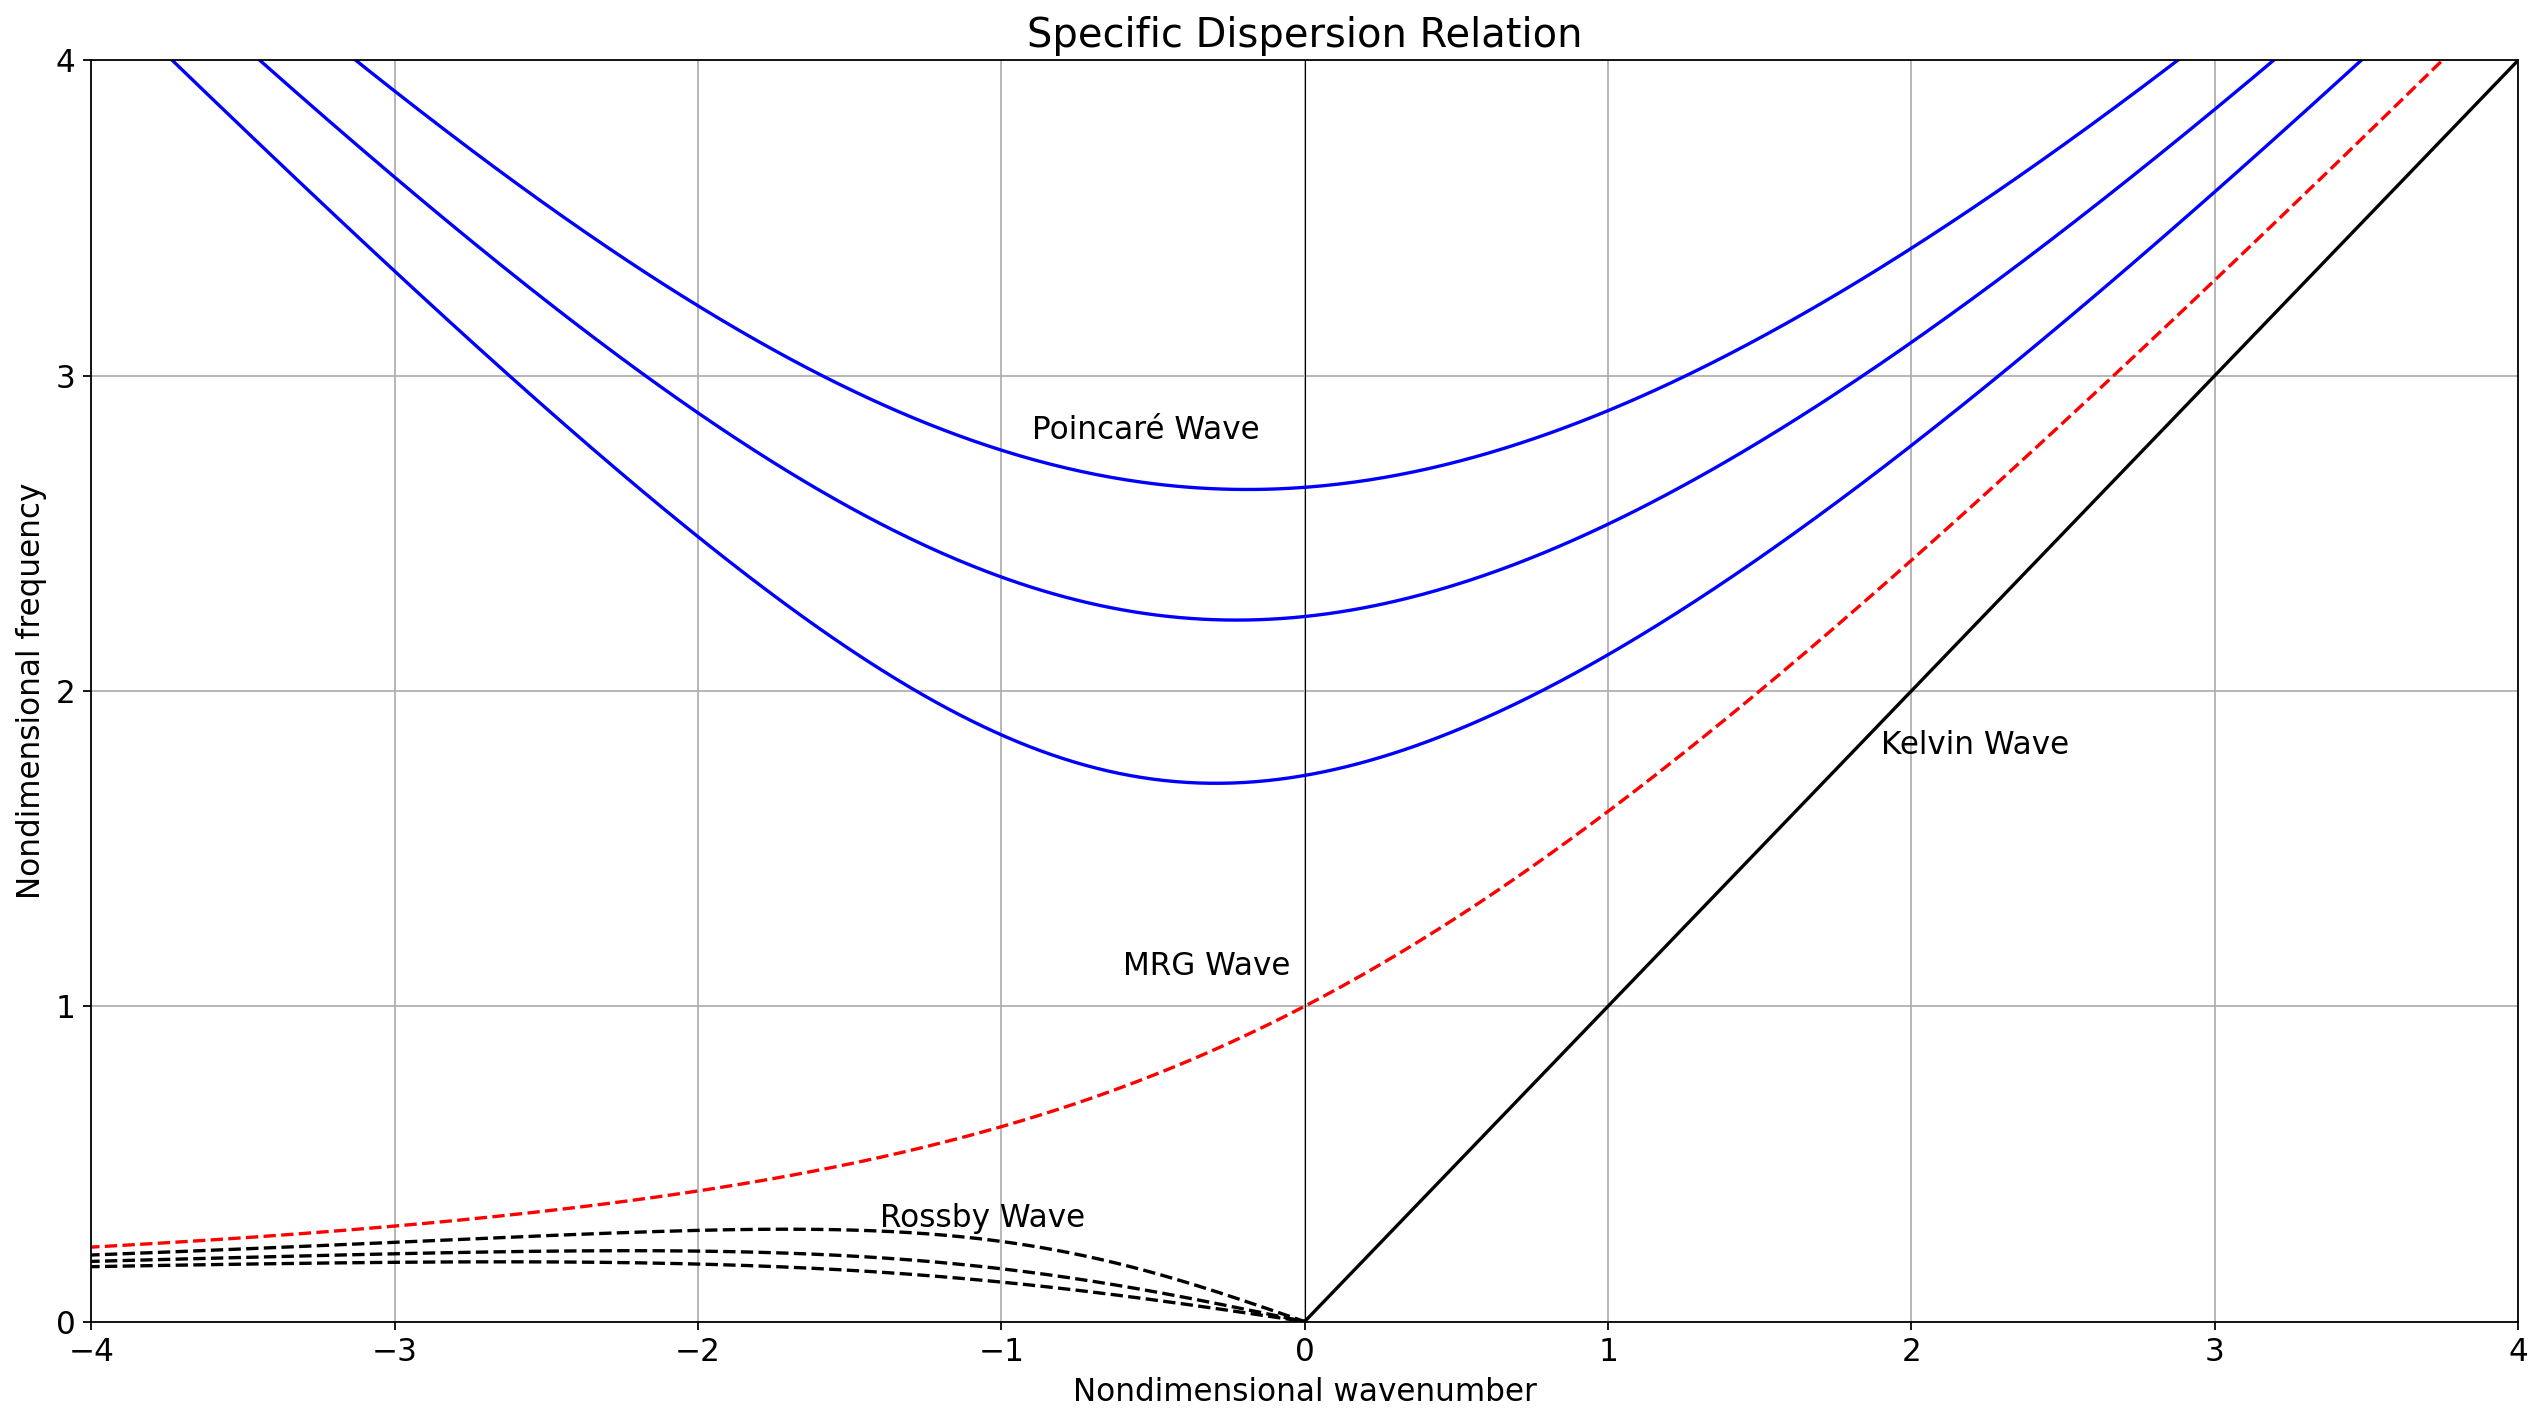

In [10]:
display_specific_dispersion_relation(method="iterative")

## **Appendix: Wheeler-Kiladis Diagram**

The plane wave form is given by:

$$e^{i(\hat{k}\hat{x} - \hat{\omega} \hat{t})}$$

Here:
- $\hat{k}$: Angular wavenumber (radians per unit distance)
- $\hat{\omega}$: Angular frequency (radians per unit time)
- $\hat{x}:$ unit distance, range from $[0,1)$
- $\hat{t}:$ unit time, range from $[0,1)$

---

### **Conversion between Angular and Ordinary Frequency**

In wave analysis, **angular quantities** are dimensionless and measured in **radians**. These are commonly used in mathematical models, while **ordinary quantities** are expressed in **cycles**, which are more intuitive for interpreting wave patterns.

To convert to **ordinary quantities**:
- Wavenumber : $$k_{ord} = \frac{k_{ang}}{2\pi}$$
- Frequency : $$\omega_{ord} = \frac{\omega_{ang}}{2\pi}$$

---

### **Conversion between Unit Distance $(X = 1)$ and Sphere $(X = 2 \pi R)$**

To analyze global wave patterns, we scale from unit length to Earth's spherical surface: $$x = \hat{x} \cdot 2 \pi R$$
This ensures the wave equation accounts for Earth's size. The spherical wavenumber is then:$$k = \hat{k} \cdot \frac{1}{2 \pi R}$$

---

### **Conversion between Dimension and Dimensionless**

Reference from Vallis 1.11.1: 

"... nondimensional variables, by which we mean expressing every variable as the ratio of its value to some reference value"

For tropical dynamics, we choose characteristic scale as follows (see Vallis 8.1): 
- Characteristic Time: $$T_{eq} = \sqrt{\frac{1}{c\beta}}$$
- Characteristic Length: $$L_{eq} = \sqrt{\frac{c}{\beta}}$$

We can convert dimensional variables into nondimensional variables using these scales:
$$T = \tilde{T} \cdot T_{eq} \Longrightarrow \tilde{T} = T \cdot \frac{1}{T_{eq}}$$
$$L = \tilde{L} \cdot L_{eq} \Longrightarrow \tilde{L} = L \cdot \frac{1}{L_{eq}}$$

This approach allows us to express time, length, and other variables in a normalized form. Specifically, the wavenumber becomes: $$\tilde{k} = k \cdot L_{eq}$$

---

### **Wheeler-Kiladis Diagram**

The Wheeler-Kiladis Diagram requires calculating the dimensional frequency (cycles per day, $\omega_{cpd}$) from zonal wave modes (ordinary dimensionless wavenumber, $k_0$) using the dispersion relation. The procedure is as follows:

0. Predefined Characteristic Scales:
    - Characteristic Time (in seconds): $$T_{eq} = \sqrt{\frac{1}{c\beta}}$$
    - Characteristic Length (in meters): $$L_{eq} = \sqrt{\frac{c}{\beta}}$$
    - Different equivalent depths correspond to different characteristic scales!
1. Prescribe zonal wave modes
    - Input the zonal wave modes ($k_0$), representing the ordinary wavenumber
    - Convert zonal wave modes to *angular* wavenumber: $\hat{k} = 2 \pi k_0$
2. Convert Wavenumber from $R = 1 \rightarrow R = 2 \pi R_0$ : $$k =\hat{k} \cdot \frac{1}{2 \pi R_0}$$
3. Convert Dimensional to Dimensionless Wavenumber: $$\tilde{k} = k \cdot L_{eq}$$
4. Calculate Dimensionless Angular Frequency:
    - Use the dispersion relation to obtain $\tilde{\omega}$
    - $$\tilde{\omega} = \text{dispersion\_relation} (\tilde{k})$$
5. Convert to Dimensional Angular Frequency: $$\omega = \tilde{\omega} \cdot \frac{1}{T_{eq}}$$
6. Convert from (radians/second) to (cycles/day): $$\omega_{cpd} = \frac{\omega}{2 \pi} \times 86400$$

In [ ]:
# Constants
SOLAR_DAY_SECONDS = 86400
EARTH_ANGULAR_VELOCITY = 2 * np.pi / 86164.1
EARTH_RADIUS_METERS = 6.371e6
EARTH_GRAVITY_ACCELERATION = 9.78


def get_equatorial_characteristic_scale(equivalent_depths=np.array([50.0, 25.0, 12.5])):
    """
    Calculate the equatorial characteristic time and length scales for given equivalent depths.

    Parameters:
    equivalent_depths : array-like, optional
        An array of equivalent depths in meters. Default values are [50.0, 25.0, 12.5] meters.
        Equivalent depth represents the depth at which the gravity wave speed is calculated.

    Returns:
    characteristic_time : array-like
        Characteristic time scales in seconds, calculated as 1/sqrt(c * beta), where:
            - c: Gravity wave speed (m/s)
            - beta: Rossby parameter (1/m/s)
    characteristic_length : array-like
        Characteristic length scales in meters, calculated as sqrt(c / beta), where:
            - c: Gravity wave speed (m/s)
            - beta: Rossby parameter (1/m/s)

    Notes:
    - The Coriolis frequency (f) and Rossby parameter (beta) are calculated for the equator (latitude = 0).
    """

    def get_f_beta(latitude: float = 0.0):
        """
        Calculate the Coriolis frequency (f) and Rossby parameter (beta) at a given latitude.

        Parameters:
        latitude : float
            Latitude in radians.

        Returns:
        coriolis_frequency : float
            Coriolis frequency in 1/second.
        rossby_parameter : float
            Rossby parameter (beta) in 1/meter/second.
        """
        coriolis_frequency = (
            2 * EARTH_ANGULAR_VELOCITY * np.sin(latitude)
        )  # Coriolis frequency
        rossby_parameter = (
            2 * EARTH_ANGULAR_VELOCITY * np.cos(latitude) / EARTH_RADIUS_METERS
        )  # Rossby parameter (beta)
        return coriolis_frequency, rossby_parameter

    def get_gravity_wave_speed(equivalent_depth):
        """
        Calculate the gravity wave speed for a given equivalent depth.

        Parameters:
        equivalent_depth : float
            Equivalent depth in meters.

        Returns:
        c : float
            Gravity wave speed in meters/second.
        """
        c = np.sqrt(EARTH_GRAVITY_ACCELERATION * equivalent_depth)  # Gravity wave speed
        return c

    f_coriolis, rossby_parameter = get_f_beta()
    gravity_wave_speeds = get_gravity_wave_speed(equivalent_depths)

    characteristic_length = np.sqrt(gravity_wave_speeds / rossby_parameter)
    characteristic_time = 1 / np.sqrt(gravity_wave_speeds * rossby_parameter)

    return characteristic_time, characteristic_length


def get_CPD_from_zonal_wave_mode(
    zonal_wavemodes,
    dispersion_relation,
    characteristic_time=1,
    characteristic_length=1,
):
    """
    Calculate the frequency in cycles per day (CPD) from given zonal wave modes.

    Parameters:
    zonal_wavemodes : array-like
        Zonal wave modes representing the wavenumber (dimensionless).
    dispersion_relation : callable
        A function that takes nondimensional wavenumber as input and returns nondimensional frequency.
    characteristic_time : float, optional
        Characteristic time scale (seconds), typically calculated from the equatorial dynamics.
    characteristic_length : float, optional
        Characteristic length scale (meters), typically calculated from the equatorial dynamics.


    Returns:
    cpd_frequency : array-like
        Frequency in cycles per day (CPD), obtained by converting the dimensional frequency.
    """
    dim_wavenumber = (2 * np.pi * zonal_wavemodes) / (2 * np.pi * EARTH_RADIUS_METERS)
    nondim_wavenumber = dim_wavenumber * characteristic_length
    nondim_frequency = dispersion_relation(nondim_wavenumber)
    dim_frequency = nondim_frequency * (1 / characteristic_time)
    cpd_frequency = dim_frequency * SOLAR_DAY_SECONDS / (2 * np.pi)
    return cpd_frequency

In [12]:
def display_Wheeler_Kiladis_dispersion_line(
    zonal_wavemodes, characteristic_time, characteristic_length
):
    plt.figure(figsize=(16, 9), dpi=160)
    for i in range(len(characteristic_time)):
        cpd_frequency = get_CPD_from_zonal_wave_mode(
            zonal_wavemodes=zonal_wavemodes,
            characteristic_time=characteristic_time[i],
            characteristic_length=characteristic_length[i],
            dispersion_relation=dispersion_kelvin,
        )
        plt.plot(zonal_wavemodes, cpd_frequency, "k-")

        cpd_frequency = get_CPD_from_zonal_wave_mode(
            zonal_wavemodes=zonal_wavemodes,
            characteristic_time=characteristic_time[i],
            characteristic_length=characteristic_length[i],
            dispersion_relation=lambda k: dispersion_rossby(k=k, method="iterative"),
        )
        plt.plot(zonal_wavemodes, cpd_frequency, "k--")

        cpd_frequency = get_CPD_from_zonal_wave_mode(
            zonal_wavemodes=zonal_wavemodes,
            characteristic_time=characteristic_time[i],
            characteristic_length=characteristic_length[i],
            dispersion_relation=lambda k: dispersion_poincare(k=k, method="iterative"),
        )
        plt.plot(zonal_wavemodes, cpd_frequency, "b--")

        cpd_frequency = get_CPD_from_zonal_wave_mode(
            zonal_wavemodes=zonal_wavemodes,
            characteristic_time=characteristic_time[i],
            characteristic_length=characteristic_length[i],
            dispersion_relation=dispersion_mrg,
        )
        plt.plot(zonal_wavemodes, cpd_frequency, "r-.")
    plt.grid(True)
    plt.xlabel("Zonal wavenumbers")
    plt.ylabel("Frequency")
    plt.xlim(-15, 15)
    plt.ylim(0, 0.8)
    plt.title("Dispersion Line for Wheeler-Kiladis")
    return None

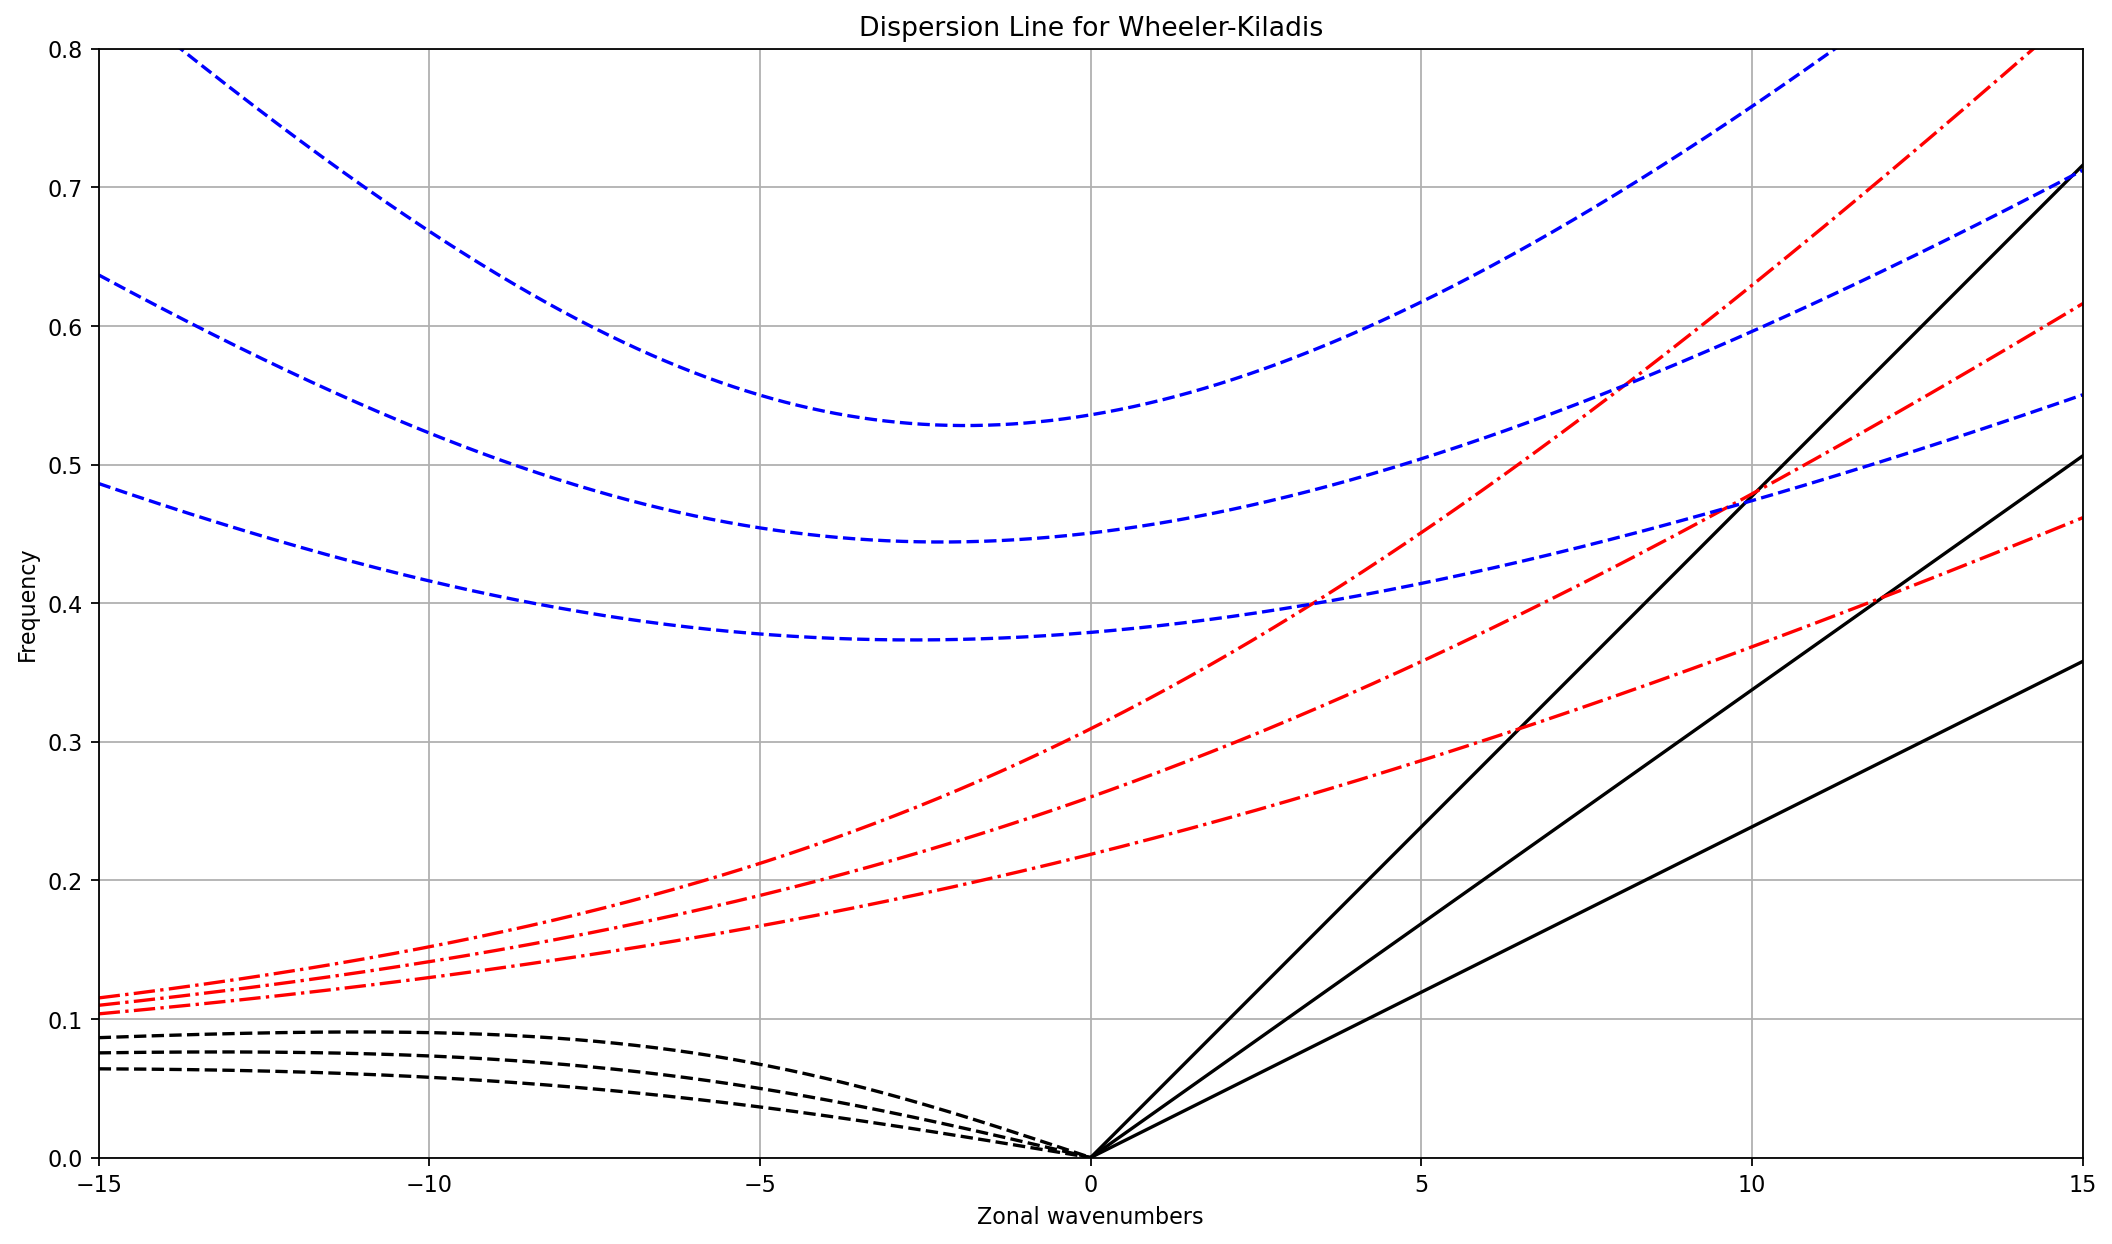

In [13]:
characteristic_time, characteristic_length = get_equatorial_characteristic_scale()
display_Wheeler_Kiladis_dispersion_line(
    zonal_wavemodes=np.linspace(-15, 15, 2000),
    characteristic_time=characteristic_time,
    characteristic_length=characteristic_length,
)